##データの取り込み、確認

In [7]:
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic", style="white")
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

zsh:1: command not found: pip


In [9]:
#データの取り込み
df_train_master = pd.read_csv("/content/drive/MyDrive/data/customer_segment_train.csv")
df_submit_master = pd.read_csv("/content/drive/MyDrive/data/customer_segment_test.csv")

display(df_train_master.head())
display(df_submit_master.head())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
1,465025,Male,Yes,73,Yes,Executive,0.0,High,2.0,Cat_6,C
2,461687,Female,Yes,77,Yes,Artist,0.0,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
4,459591,Male,Yes,50,Yes,Artist,1.0,Average,3.0,Cat_6,C


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,461642,Male,No,41,Yes,Artist,9.0,Low,2.0,Cat_6
1,462489,Male,Yes,46,Yes,Artist,0.0,Low,2.0,Cat_6
2,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6
3,461424,Male,Yes,63,No,Healthcare,0.0,Average,4.0,Cat_4
4,460283,Male,Yes,43,Yes,Doctor,14.0,Low,2.0,Cat_6


##データ探索(EDA)

In [10]:
#学習データ
display(df_train_master.info())
display(df_train_master.describe(include="all"))

#多くの変数に欠損がみられる
#欠損がないのはID,Gender,Age,Spending_Score,Segmentationのみ
#Work_Wxperienceは平均値と中央値に乖離がみられる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   object 
 2   Ever_Married     6338 non-null   object 
 3   Age              6454 non-null   int64  
 4   Graduated        6396 non-null   object 
 5   Profession       6355 non-null   object 
 6   Work_Experience  5781 non-null   float64
 7   Spending_Score   6454 non-null   object 
 8   Family_Size      6190 non-null   float64
 9   Var_1            6392 non-null   object 
 10  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 554.8+ KB


None

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,6454.000000,6454,6338,6454.000000,6396,6355,5781.000000,6454,6190.000000,6392,6454
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,3563,3690,NaN,3960,1980,NaN,3886,NaN,4211,1843
mean,463493.070964,NaN,NaN,43.235203,NaN,NaN,2.604048,NaN,2.862036,NaN,NaN
std,2583.148482,NaN,NaN,16.693985,NaN,NaN,3.362028,NaN,1.529702,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461285.250000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463506.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465735.750000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [11]:
#予測用データ
display(df_submit_master.info())
display(df_submit_master.describe(include="all"))

#train同様多くの変数に欠損がある
#欠損がないのはID,Gender,Age,Spending_Scoreのみ
#Work_Wxperienceは平均値と中央値にやや乖離がみられる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1614 non-null   int64  
 1   Gender           1614 non-null   object 
 2   Ever_Married     1590 non-null   object 
 3   Age              1614 non-null   int64  
 4   Graduated        1594 non-null   object 
 5   Profession       1589 non-null   object 
 6   Work_Experience  1458 non-null   float64
 7   Spending_Score   1614 non-null   object 
 8   Family_Size      1543 non-null   float64
 9   Var_1            1600 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 126.2+ KB


None

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,1614.000000,1614,1590,1614.000000,1594,1589,1458.000000,1614,1543.000000,1600
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6
freq,NaN,854,953,NaN,1008,536,NaN,992,NaN,1027
mean,463423.806072,NaN,NaN,44.393432,NaN,NaN,2.790809,NaN,2.802333,NaN
std,2643.817216,NaN,NaN,16.755511,NaN,NaN,3.575943,NaN,1.537831,NaN
min,458988.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN
25%,461095.750000,NaN,NaN,31.250000,NaN,NaN,0.000000,NaN,2.000000,NaN
50%,463306.500000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN
75%,465760.500000,NaN,NaN,55.000000,NaN,NaN,5.000000,NaN,4.000000,NaN


In [12]:
#EDA用にmasterデータのコピーを作成
df_eda = df_train_master.copy()

<Axes: xlabel='Segmentation', ylabel='count'>

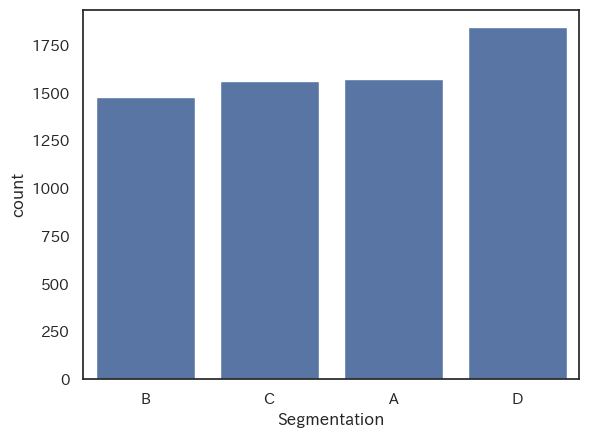

In [13]:
#Segmentation
sns.countplot(x="Segmentation", data=df_eda)

#Dがやや多いがほぼ均等

Gender  Segmentation
Female  A                723
        B                682
        C                713
        D                773
Male    A                848
        B                798
        C                847
        D               1070
Name: ID, dtype: int64

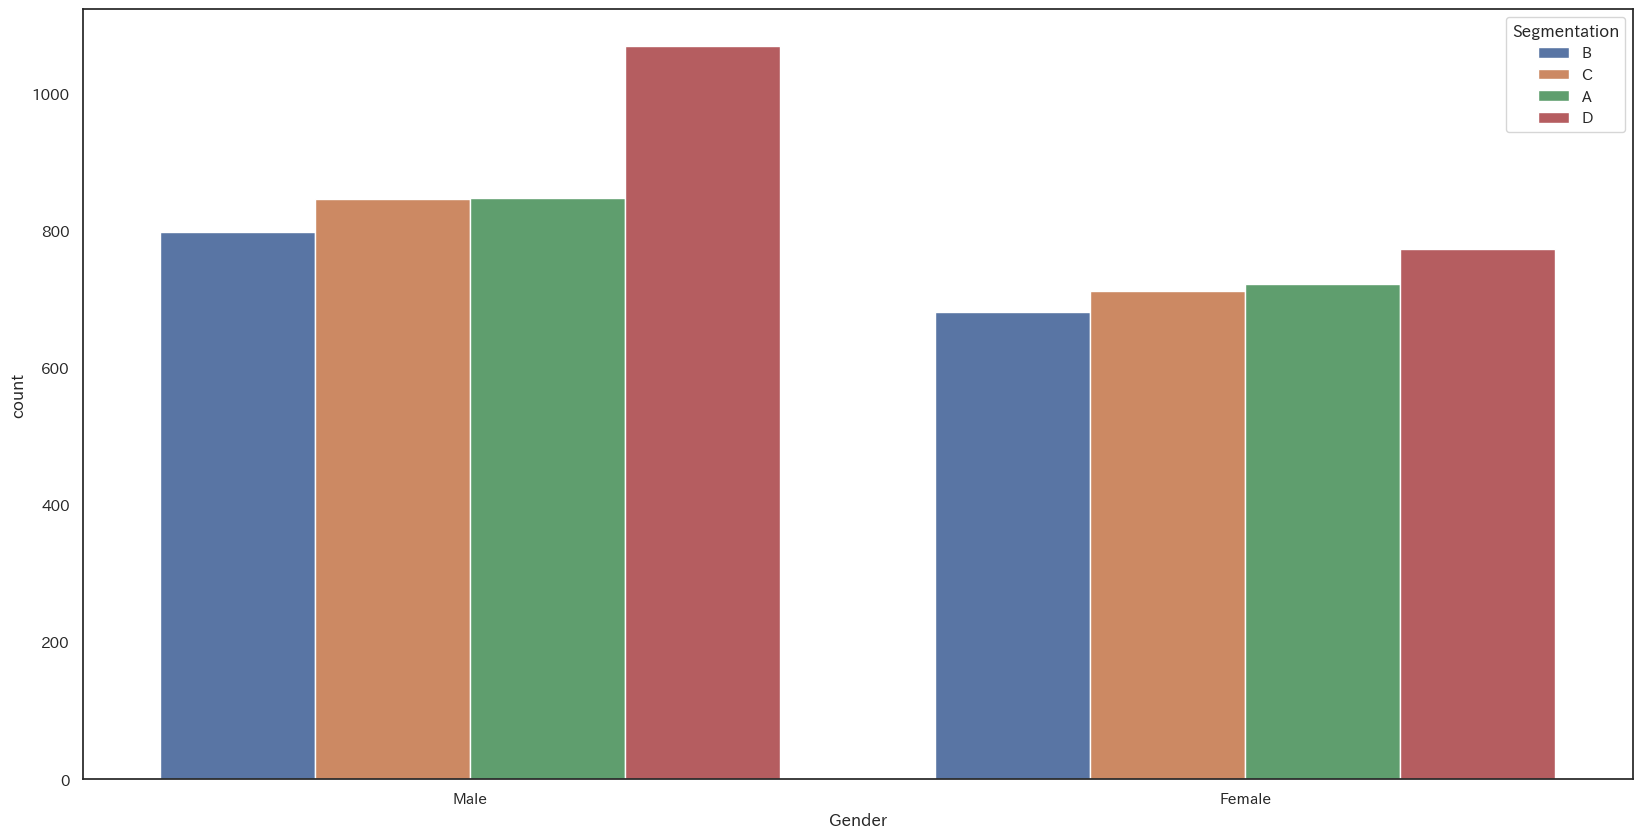

In [14]:
#Gender
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Gender", hue="Segmentation", data=df_eda)
df_eda.groupby(["Gender","Segmentation"]).count()["ID"]

#男性はDの比率が高い

In [15]:
#Ever_Married欠損確認(116行欠損)
df_eda.query('Ever_Married != Ever_Married').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5,460504,Male,NaN,43,No,Executive,NaN,Average,3.0,Cat_3,A
31,460650,Female,NaN,20,No,Homemaker,13.0,Low,1.0,Cat_4,D
40,466522,Male,NaN,18,No,NaN,6.0,High,4.0,Cat_3,D
66,465983,Male,NaN,19,No,Healthcare,0.0,Low,3.0,Cat_6,D
207,465467,Male,NaN,33,No,Healthcare,1.0,Low,3.0,Cat_6,C
272,460669,Male,NaN,48,Yes,Executive,0.0,Low,2.0,Cat_1,B
356,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
388,459699,Female,NaN,61,Yes,Engineer,9.0,Average,3.0,Cat_6,B
560,467110,Male,NaN,60,Yes,Lawyer,1.0,High,1.0,Cat_6,D
604,466137,Female,NaN,31,No,Healthcare,0.0,Low,4.0,Cat_6,C


Ever_Married  Segmentation
NULL          A                 29
              B                 27
              C                 21
              D                 39
No            A                640
              B                382
              C                315
              D               1311
Yes           A                902
              B               1071
              C               1224
              D                493
Name: ID, dtype: int64

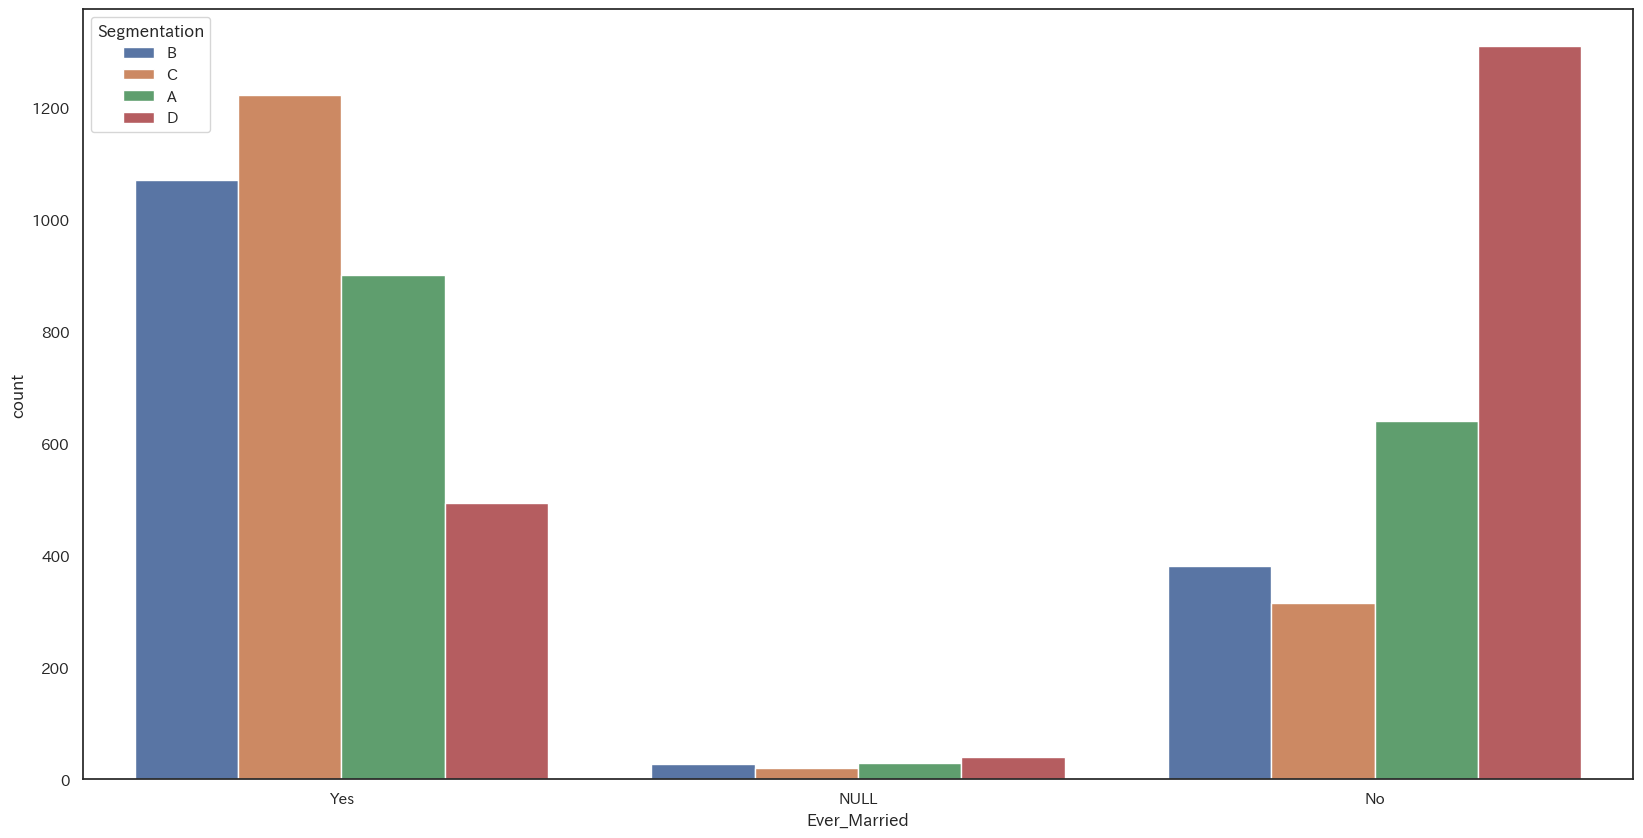

In [16]:
#Ever_Married

#欠損を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Ever_Married"] = df_eda["Ever_Married"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Ever_Married", hue="Segmentation", data=df_eda)
df_eda.groupby(["Ever_Married", "Segmentation"]).count()["ID"]

#結婚歴があるとB,Cの比率が高くなり、結婚していないとDの比率が高い
#NULLのセグメント比率はほぼ均等

Segmentation,A,B,C,D
count,1571.000000,1480.000000,1560.000000,1843.000000
mean,44.717377,47.979730,49.087821,33.207813
std,16.322048,14.758717,14.493567,15.716016
min,18.000000,18.000000,18.000000,18.000000
25%,32.500000,37.000000,38.000000,22.000000
50%,41.000000,46.000000,49.000000,29.000000
75%,52.000000,58.000000,58.000000,37.000000
max,89.000000,89.000000,89.000000,89.000000


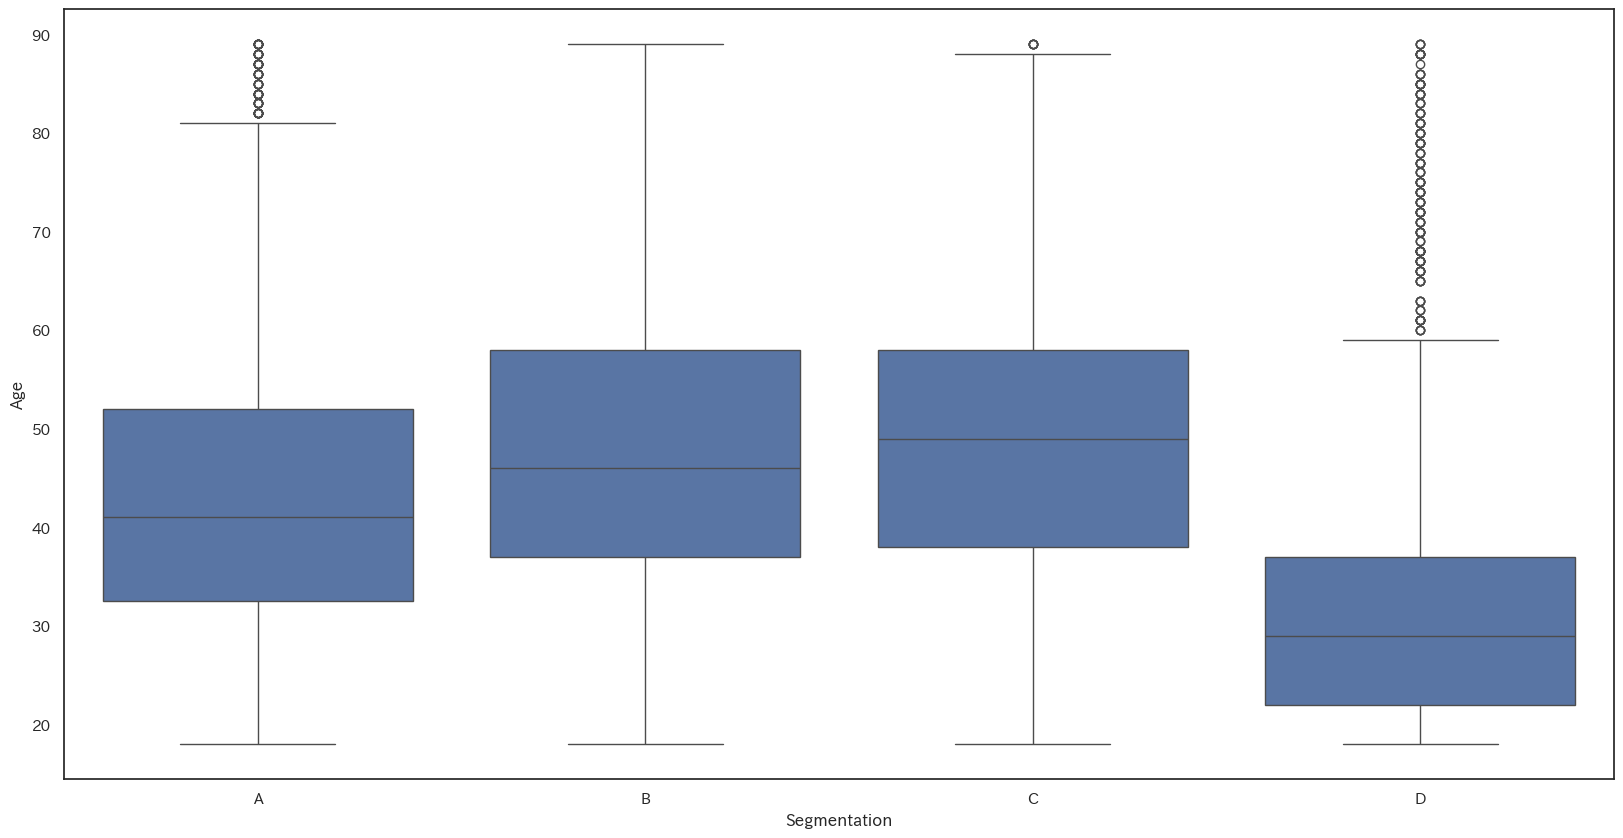

In [17]:
#Age
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation", y="Age", data=df_eda, order=["A", "B", "C", "D"])
df_eda.groupby("Segmentation").describe()["Age"].T

#D,A,B,Cの順に若い人が多い

In [18]:
#Graduated欠損確認(58行欠損)
df_eda.query('Graduated != Graduated').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
270,463351,Female,No,22,NaN,Healthcare,3.0,Low,4.0,Cat_5,D
475,465257,Male,No,20,NaN,Healthcare,4.0,Low,5.0,Cat_2,D
702,466623,Male,Yes,56,NaN,Entertainment,4.0,Average,4.0,Cat_3,C
789,464973,Male,No,82,NaN,Lawyer,1.0,Low,2.0,Cat_4,A
1076,464392,Male,Yes,58,NaN,Artist,1.0,Average,2.0,Cat_6,B
1128,465058,Female,No,43,NaN,Entertainment,NaN,Low,1.0,Cat_6,B
1206,460679,Female,No,19,NaN,Healthcare,9.0,Low,4.0,Cat_3,D
1280,466654,Male,No,30,NaN,Marketing,8.0,Low,1.0,Cat_6,A
1354,463494,Male,Yes,47,NaN,Healthcare,NaN,Average,4.0,Cat_6,D
1549,466012,Male,Yes,56,NaN,Artist,2.0,Average,3.0,Cat_4,B


Graduated  Segmentation
NULL       A                 17
           B                 15
           C                 12
           D                 14
No         A                587
           B                408
           C                276
           D               1165
Yes        A                967
           B               1057
           C               1272
           D                664
Name: ID, dtype: int64

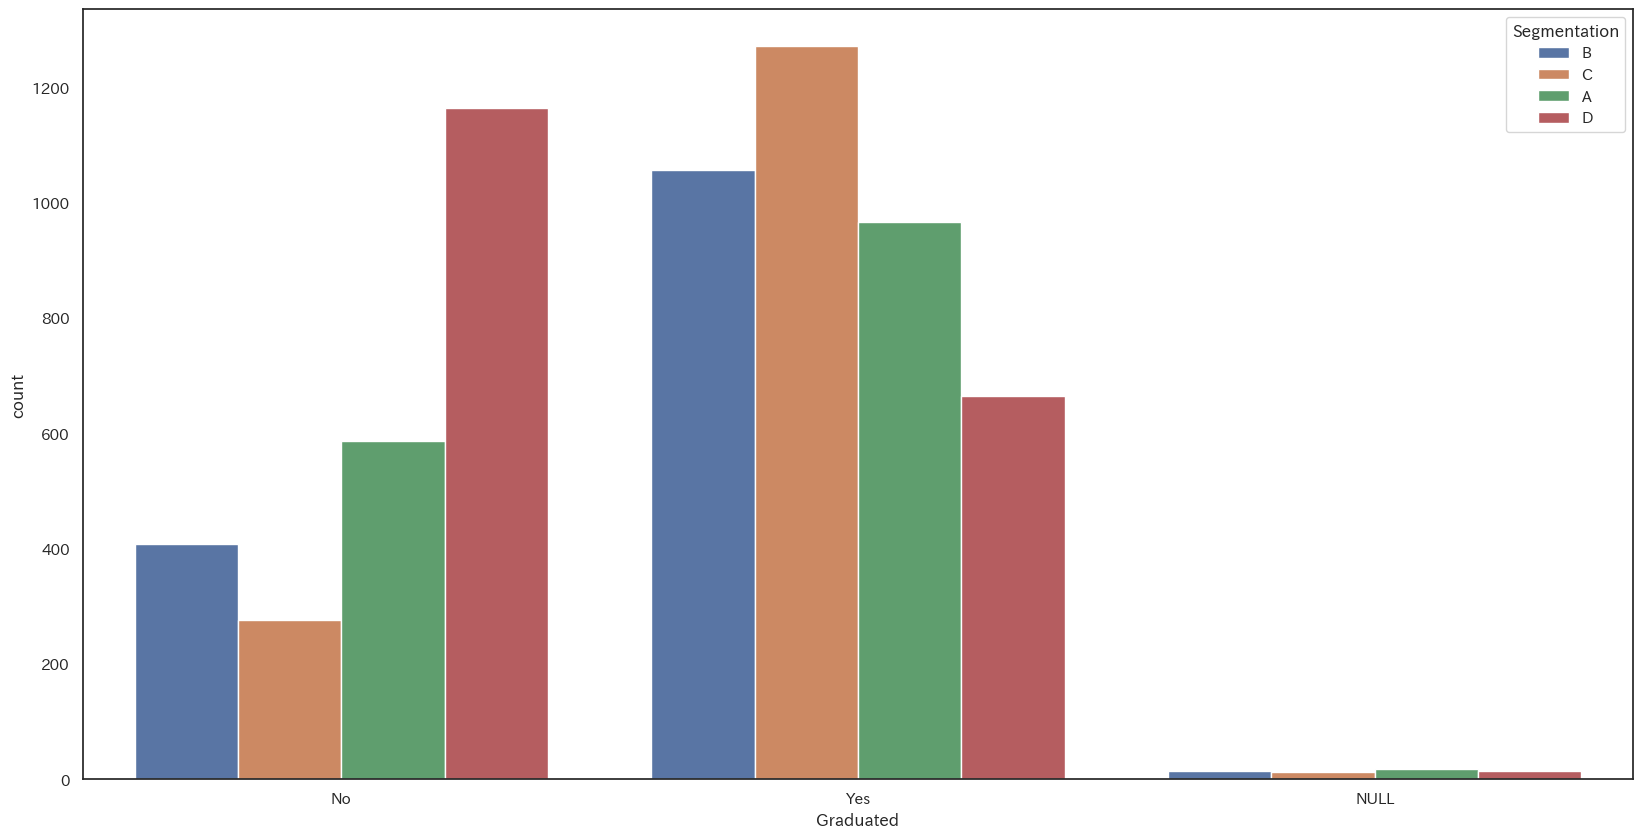

In [19]:
#Graduated

#欠損を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Graduated"] = df_eda["Graduated"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Graduated", hue="Segmentation", data=df_eda)
df_eda.groupby(["Graduated","Segmentation"]).count()["ID"]

#大学を卒業していない人はDの比率が高く、卒業した人はB,Cの比率が高い
#NULLのセグメント比率はほぼ均等

In [20]:
#Profession欠損確認(99行欠損)
df_eda.query('Profession != Profession').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
40,466522,Male,NULL,18,No,NaN,6.0,High,4.0,Cat_3,D
73,460353,Male,No,31,Yes,NaN,6.0,Low,1.0,Cat_4,D
102,464933,Male,No,25,No,NaN,0.0,Low,1.0,Cat_4,D
135,466167,Male,Yes,56,No,NaN,1.0,Low,2.0,Cat_4,B
167,462483,Male,Yes,63,Yes,NaN,1.0,Average,2.0,Cat_6,C
174,464707,Male,Yes,48,No,NaN,1.0,Average,4.0,Cat_4,A
287,466377,Male,Yes,62,Yes,NaN,8.0,Average,2.0,Cat_6,C
344,461226,Male,Yes,51,Yes,NaN,1.0,Low,2.0,Cat_6,D
375,467675,Female,No,39,No,NaN,NaN,Low,1.0,Cat_6,A
444,459656,Male,No,22,No,NaN,NaN,Low,6.0,Cat_1,D


Profession  Segmentation
Artist      A               432
            B               595
            C               845
            D               108
Doctor      A               155
                           ... 
Marketing   D               129
NULL        A                27
            B                18
            C                15
            D                39
Name: ID, Length: 40, dtype: int64

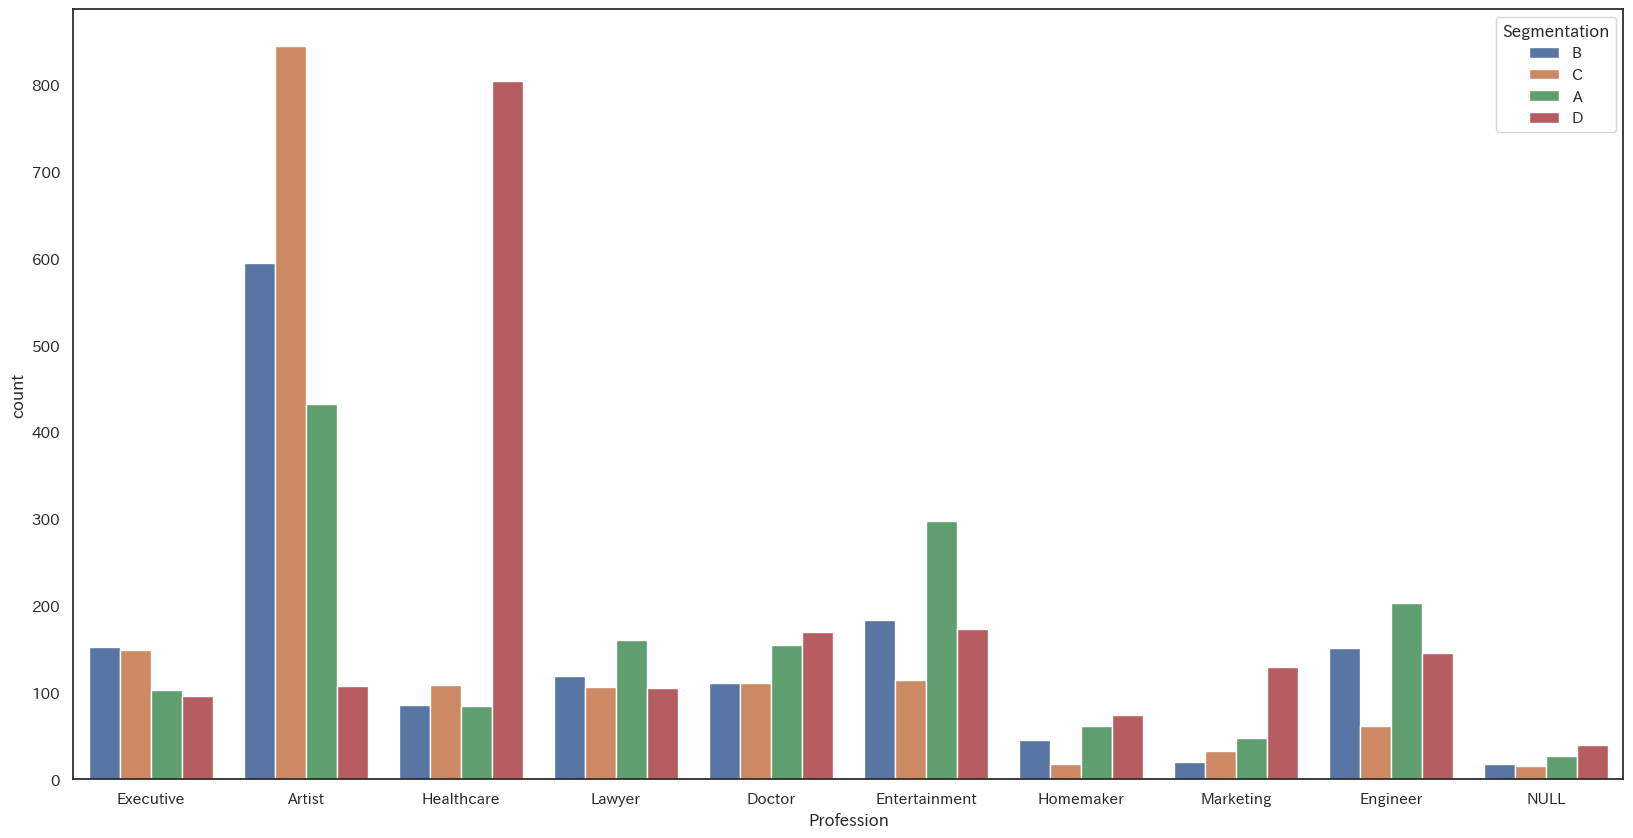

In [21]:
#Profession

#欠損を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Profession"] = df_eda["Profession"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Profession", hue="Segmentation", data=df_eda)
df_eda.groupby(["Profession","Segmentation"]).count()["ID"]

#各職業でセグメント比率にかなりばらつきがある
#人数の多い職業では、ArtistはC,HealthcareはDが多い

In [22]:
#Work_Experience欠損確認(673行欠損)
df_eda.query('Work_Experience != Work_Experience').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
5,460504,Male,NULL,43,No,Executive,NaN,Average,3.0,Cat_3,A
13,462623,Male,No,35,No,Healthcare,NaN,Low,1.0,Cat_4,D
27,467514,Male,No,43,Yes,Artist,NaN,Low,4.0,Cat_6,D
29,461464,Male,No,59,Yes,Entertainment,NaN,Low,3.0,Cat_6,B
33,467206,Female,No,52,Yes,Artist,NaN,Low,1.0,Cat_6,C
42,464763,Female,Yes,49,No,Engineer,NaN,Average,4.0,Cat_4,B
44,461201,Female,No,59,Yes,Artist,NaN,Low,1.0,Cat_6,C
46,459602,Female,Yes,86,No,Lawyer,NaN,Low,1.0,Cat_6,D


Segmentation
D    235
B    158
A    154
C    126
Name: count, dtype: int64

Segmentation,A,B,C,D
count,1417.000000,1322.000000,1434.000000,1608.00000
mean,2.812985,2.358548,2.165272,3.01306
std,3.561153,3.192066,2.943505,3.59879
min,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.00000
50%,1.000000,1.000000,1.000000,1.00000
75%,5.000000,3.000000,3.000000,6.00000
max,14.000000,14.000000,14.000000,14.00000


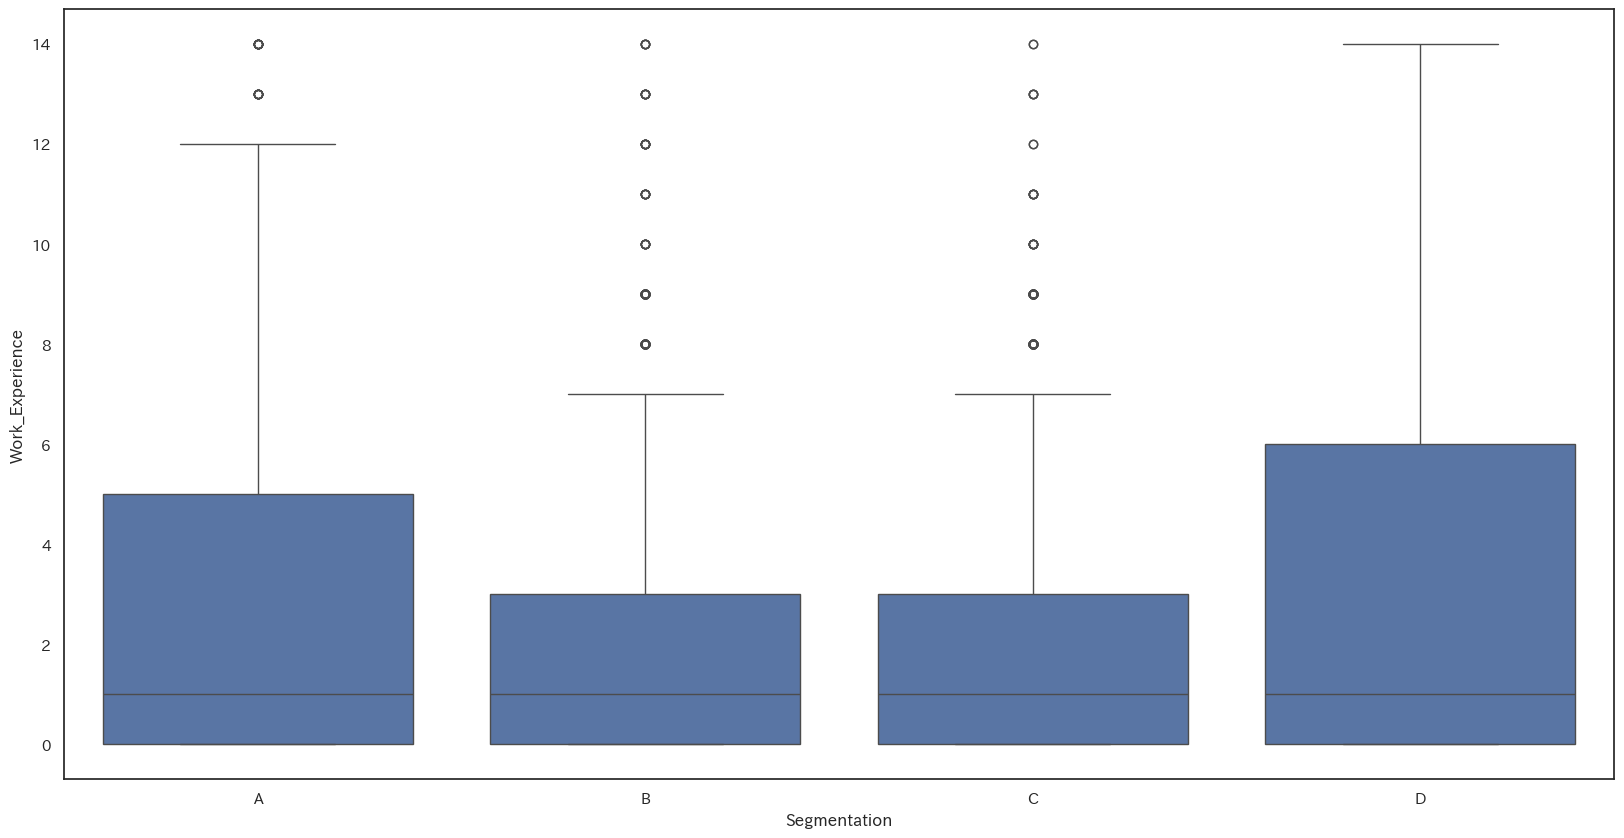

In [33]:
#Work_Experience

#欠損のセグメント比率を計算
adohoc = df_eda.query('Work_Experience != Work_Experience')
display(adohoc["Segmentation"].value_counts())

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation", y="Work_Experience", data=df_eda, order=["A", "B", "C", "D"])
df_eda.groupby("Segmentation").describe()["Work_Experience"].T

#欠損はDの比率がやや高いため、特徴量として使用できる
#D,A,B,Cの順に職務歴が長い
#欠損は中央値で埋めつつ、work_experienceがNULLか否かの列を新しく作るのが良さそう

Spending_Score  Segmentation
Average         A                280
                B                488
                C                716
                D                103
High            A                222
                B                307
                C                325
                D                127
Low             A               1069
                B                685
                C                519
                D               1613
Name: ID, dtype: int64

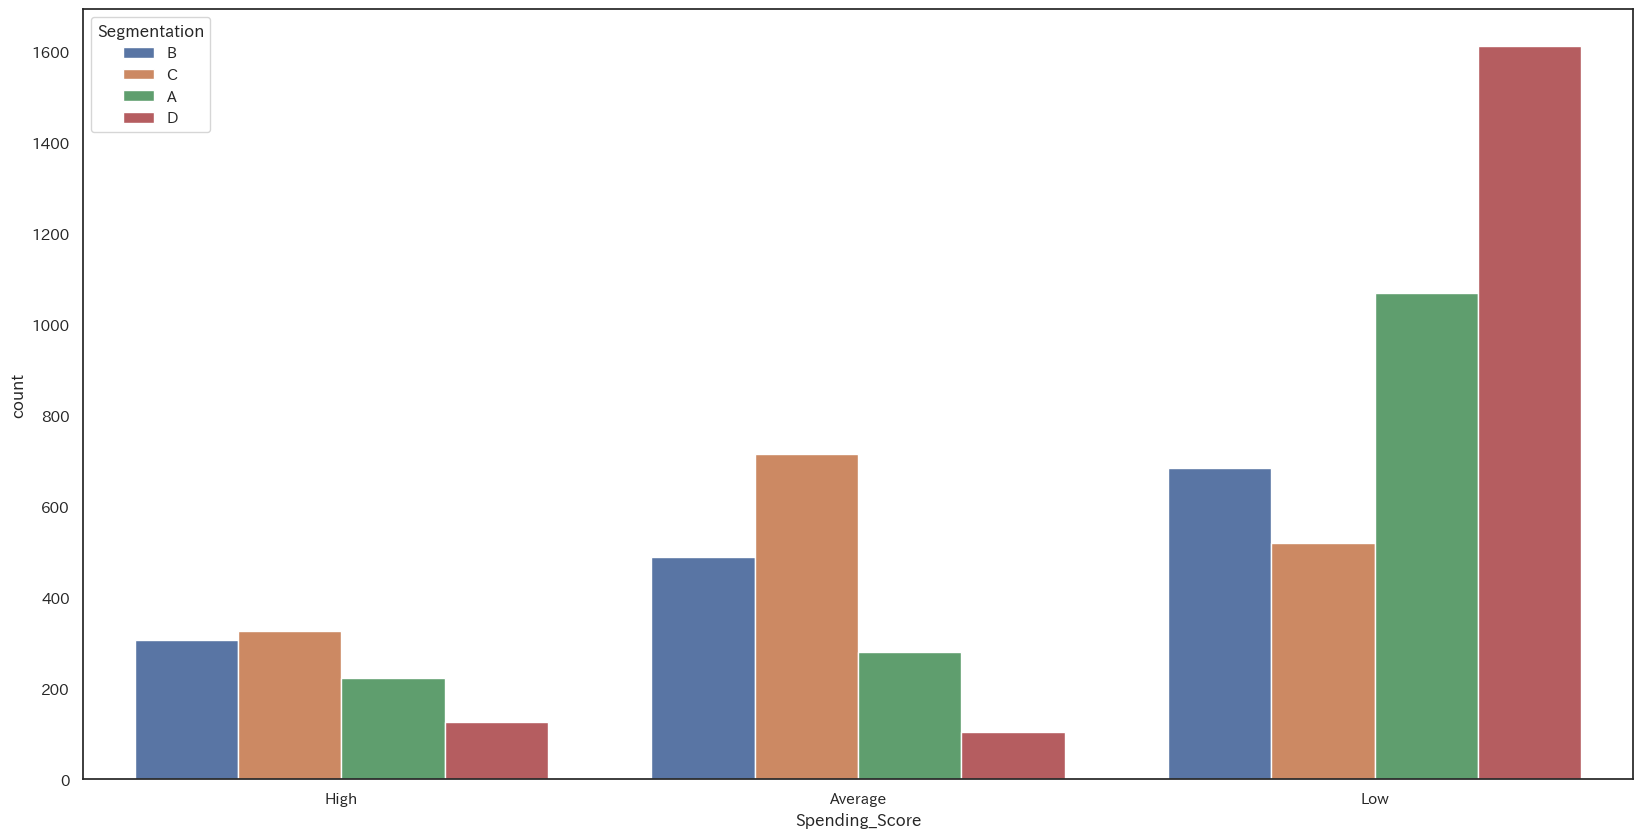

In [34]:
#Spending_Score
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Spending_Score", hue="Segmentation", data=df_eda)
df_eda.groupby(["Spending_Score","Segmentation"]).count()["ID"]

#LowだけDの比率が極端に多い、averageとhighでもCの比率に差がある

In [35]:
#Family_Size欠損確認(264行欠損)
df_eda.query('Family_Size != Family_Size').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
23,459941,Male,Yes,65,Yes,Artist,4.0,Low,NaN,Cat_6,B
56,466173,Male,No,28,No,Entertainment,1.0,Low,NaN,Cat_3,A
67,459129,Female,No,26,Yes,Marketing,9.0,Low,NaN,Cat_3,D
81,460457,Female,No,43,Yes,Entertainment,8.0,Low,NaN,Cat_3,A
86,467568,Male,No,42,Yes,Artist,8.0,Low,NaN,Cat_6,A
107,462778,Male,Yes,60,Yes,Entertainment,0.0,Low,NaN,Cat_6,D
142,460619,Male,No,52,Yes,Entertainment,NaN,Low,NaN,Cat_3,C
175,459487,Male,Yes,67,No,Lawyer,NaN,Low,NaN,Cat_6,D
176,460651,Male,No,32,No,Homemaker,8.0,Low,NaN,Cat_4,A
243,466557,Female,No,21,No,Healthcare,7.0,Low,NaN,Cat_6,D


Segmentation
D    120
A     73
C     36
B     35
Name: count, dtype: int64

Segmentation,A,B,C,D
count,1498.000000,1445.000000,1524.000000,1723.000000
mean,2.440587,2.723183,2.998688,3.224028
std,1.484098,1.418925,1.373704,1.679197
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000
max,9.000000,9.000000,9.000000,9.000000


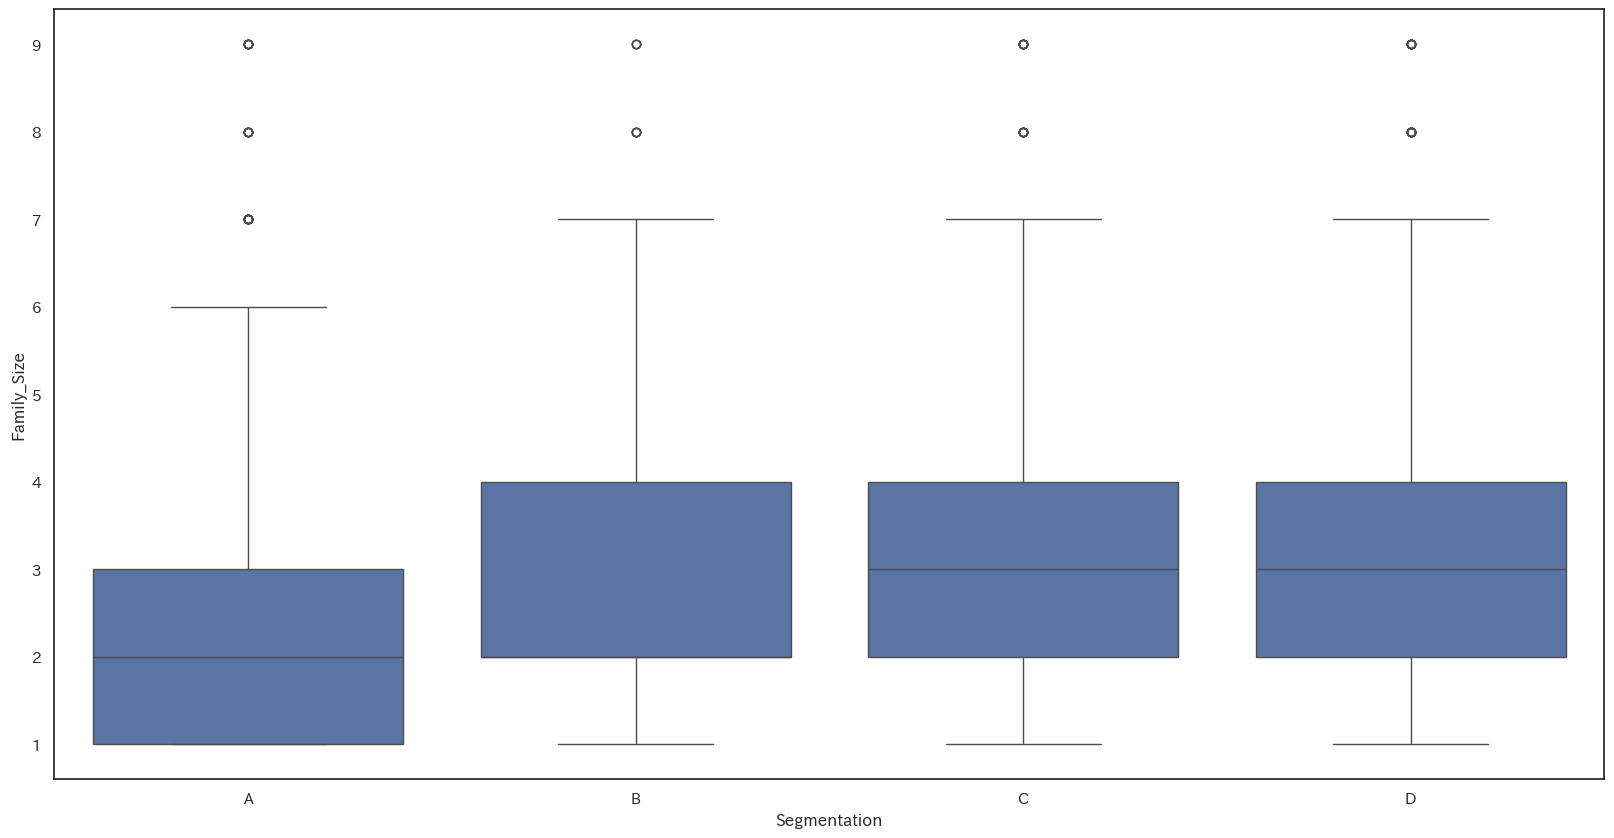

In [36]:
#Family_Size

#欠損のセグメント比率を計算
adohoc = df_eda.query('Family_Size != Family_Size')
display(adohoc["Segmentation"].value_counts())

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Segmentation", y="Family_Size", data=df_eda, order=["A", "B", "C", "D"])
df_eda.groupby("Segmentation").describe()["Family_Size"].T

#NULLはD,Aの比率が非常に高いため、特徴量として使用できる
#D,C,B,Aの順に家族人数が多い傾向がある
#欠損は中央値で埋めつつ、family_sizeがNULLか否かの列を新しく作る(もし余裕があればage,gender,spending_scoreからfamily_sizeの欠損を予測した値で埋める方がより良い)

In [37]:
#Var_1欠損確認(62行欠損)
df_eda.query('Var_1 != Var_1').head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


Var_1  Segmentation
Cat_1  A               26
       B               23
       C               22
       D               42
Cat_2  A               64
                       ..
Cat_7  D               53
NULL   A               17
       B               12
       C               17
       D               16
Name: ID, Length: 32, dtype: int64

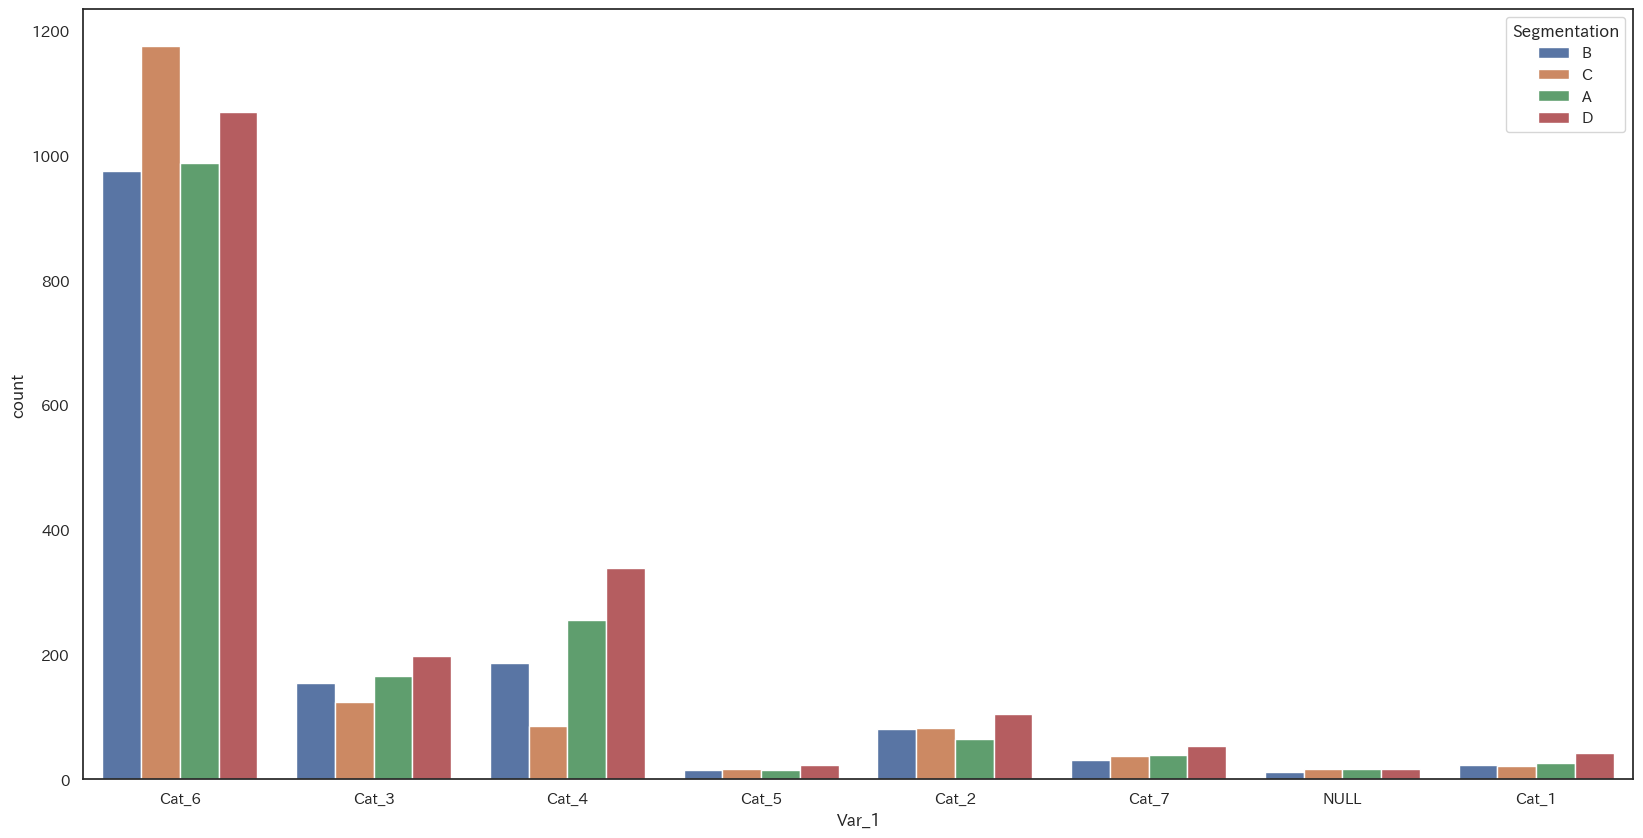

In [38]:
#Var_1

#欠損を"NULL"という名称のカテゴリーに変換してから集計
df_eda["Var_1"] = df_eda["Var_1"].fillna("NULL")

fig = plt.subplots(figsize=(20,10))
sns.countplot(x="Var_1", hue="Segmentation", data=df_eda)
df_eda.groupby(["Var_1","Segmentation"]).count()["ID"]

#各カテゴリーでセグメント比率にかなりばらつきがある
#cat6の人数が非常に多く、cat6ではCの比率が高い

##機械学習の前処理

In [39]:
#変数の再確認
df_train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6454 non-null   int64  
 1   Gender           6454 non-null   object 
 2   Ever_Married     6338 non-null   object 
 3   Age              6454 non-null   int64  
 4   Graduated        6396 non-null   object 
 5   Profession       6355 non-null   object 
 6   Work_Experience  5781 non-null   float64
 7   Spending_Score   6454 non-null   object 
 8   Family_Size      6190 non-null   float64
 9   Var_1            6392 non-null   object 
 10  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 554.8+ KB


In [40]:
df_train_master.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,463864,Male,Yes,81,No,Executive,NaN,High,2.0,Cat_6,B
1,465025,Male,Yes,73,Yes,Executive,0.0,High,2.0,Cat_6,C
2,461687,Female,Yes,77,Yes,Artist,0.0,High,2.0,Cat_6,B
3,461646,Female,Yes,60,Yes,Artist,NaN,High,4.0,Cat_6,C
4,459591,Male,Yes,50,Yes,Artist,1.0,Average,3.0,Cat_6,C
5,460504,Male,NaN,43,No,Executive,NaN,Average,3.0,Cat_3,A
6,463194,Female,Yes,48,Yes,Artist,0.0,Average,2.0,Cat_3,B
7,463733,Female,No,18,No,Healthcare,1.0,Low,3.0,Cat_6,D
8,462246,Female,Yes,84,No,Lawyer,1.0,High,2.0,Cat_6,B
9,464805,Male,Yes,35,No,Doctor,0.0,Low,1.0,Cat_4,A


In [41]:
#機械学習用のデータフレームを作成
df_train = df_train_master.copy()
df_submit = df_submit_master.copy()


#IDは削除
df_train = df_train.drop("ID",axis=1)

#Gender Maleを1,Femaleを0に
df_train["Gender"] = df_train["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df_submit["Gender"] = df_submit["Gender"].apply(lambda x: 1 if x == "Male" else 0)

#Ever_Married Yesかどうか、nullかどうかでそれぞれダミー変数を作成
df_train["Ever_Married_Yes"] = df_train["Ever_Married"].apply(lambda x: 1 if x == "Yes" else 0)
df_train["Ever_Married_null"] = df_train["Ever_Married"].apply(lambda x: 1 if x != x else 0)
df_train = df_train.drop("Ever_Married",axis=1)
df_submit["Ever_Married_Yes"] = df_submit["Ever_Married"].apply(lambda x: 1 if x == "Yes" else 0)
df_submit["Ever_Married_null"] = df_submit["Ever_Married"].apply(lambda x: 1 if x != x else 0)
df_submit = df_submit.drop("Ever_Married",axis=1)

#Age 処理の必要なし

#Graduated Yesかどうか、nullかどうかでそれぞれダミー変数を作成
df_train["Graduated_Yes"] = df_train["Graduated"].apply(lambda x: 1 if x == "Yes" else 0)
df_train["Graduated_null"] = df_train["Graduated"].apply(lambda x: 1 if x != x else 0)
df_train = df_train.drop("Graduated",axis=1)
df_submit["Graduated_Yes"] = df_submit["Graduated"].apply(lambda x: 1 if x == "Yes" else 0)
df_submit["Graduated_null"] = df_submit["Graduated"].apply(lambda x: 1 if x != x else 0)
df_submit = df_submit.drop("Graduated",axis=1)

#Profession それぞれの職業でダミー変数を作成
df_train["Profession_Executive"] = df_train["Profession"].apply(lambda x: 1 if x == "Executive" else 0)
df_train["Profession_Artist"] = df_train["Profession"].apply(lambda x: 1 if x == "Artist" else 0)
df_train["Profession_Healthcare"] = df_train["Profession"].apply(lambda x: 1 if x == "Healthcare" else 0)
df_train["Profession_Lawyer"] = df_train["Profession"].apply(lambda x: 1 if x == "Lawyer" else 0)
df_train["Profession_Doctor"] = df_train["Profession"].apply(lambda x: 1 if x == "Doctor" else 0)
df_train["Profession_Entertainment"] = df_train["Profession"].apply(lambda x: 1 if x == "Entertainment" else 0)
df_train["Profession_Homemaker"] = df_train["Profession"].apply(lambda x: 1 if x == "Homemaker" else 0)
df_train["Profession_Marketing"] = df_train["Profession"].apply(lambda x: 1 if x == "Marketing" else 0)
df_train["Profession_Engineer"] = df_train["Profession"].apply(lambda x: 1 if x == "Engineer" else 0)
df_train = df_train.drop("Profession", axis=1)
df_submit["Profession_Executive"] = df_submit["Profession"].apply(lambda x: 1 if x == "Executive" else 0)
df_submit["Profession_Artist"] = df_submit["Profession"].apply(lambda x: 1 if x == "Artist" else 0)
df_submit["Profession_Healthcare"] = df_submit["Profession"].apply(lambda x: 1 if x == "Healthcare" else 0)
df_submit["Profession_Lawyer"] = df_submit["Profession"].apply(lambda x: 1 if x == "Lawyer" else 0)
df_submit["Profession_Doctor"] = df_submit["Profession"].apply(lambda x: 1 if x == "Doctor" else 0)
df_submit["Profession_Entertainment"] = df_submit["Profession"].apply(lambda x: 1 if x == "Entertainment" else 0)
df_submit["Profession_Homemaker"] = df_submit["Profession"].apply(lambda x: 1 if x == "Homemaker" else 0)
df_submit["Profession_Marketing"] = df_submit["Profession"].apply(lambda x: 1 if x == "Marketing" else 0)
df_submit["Profession_Engineer"] = df_submit["Profession"].apply(lambda x: 1 if x == "Engineer" else 0)
df_submit = df_submit.drop("Profession", axis=1)

#Work_Experience 欠損かどうかのダミー変数を特徴量として追加し、欠損値は中央値で埋める
df_train["Work_Experience_null"] = df_train["Work_Experience"].apply(lambda x: 1 if x != x else 0)
df_train["Work_Experience"] = df_train["Work_Experience"].fillna(np.nanmedian(df_train["Work_Experience"]))
df_submit["Work_Experience_null"] = df_submit["Work_Experience"].apply(lambda x: 1 if x != x else 0)
df_submit["Work_Experience"] = df_submit["Work_Experience"].fillna(np.nanmedian(df_train["Work_Experience"]))

#Spending_Score
df_train["Spending_Score_High"] = df_train["Spending_Score"].apply(lambda x: 1 if x == "High" else 0)
df_train["Spending_Score_Low"] = df_train["Spending_Score"].apply(lambda x: 1 if x == "Low" else 0)
df_train = df_train.drop("Spending_Score",axis=1)
df_submit["Spending_Score_High"] = df_submit["Spending_Score"].apply(lambda x: 1 if x == "High" else 0)
df_submit["Spending_Score_Low"] = df_submit["Spending_Score"].apply(lambda x: 1 if x == "Low" else 0)
df_submit = df_submit.drop("Spending_Score",axis=1)

#Family_Size 欠損かどうかのダミー変数を特徴量として追加し、欠損値は中央値で埋める
df_train["Family_Size_null"] = df_train["Family_Size"].apply(lambda x: 1 if x != x else 0)
df_train["Family_Size"] = df_train["Family_Size"].fillna(np.nanmedian(df_train["Family_Size"]))
df_submit["Family_Size_null"] = df_submit["Family_Size"].apply(lambda x: 1 if x != x else 0)
df_submit["Family_Size"] = df_submit["Family_Size"].fillna(np.nanmedian(df_train["Family_Size"]))

#Var_1
df_train["Var_1_Cat_1"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_1" else 0)
df_train["Var_1_Cat_2"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_2" else 0)
df_train["Var_1_Cat_3"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_3" else 0)
df_train["Var_1_Cat_4"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_4" else 0)
df_train["Var_1_Cat_5"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_5" else 0)
df_train["Var_1_Cat_6"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_6" else 0)
df_train["Var_1_Cat_7"] = df_train["Var_1"].apply(lambda x: 1 if x == "Cat_7" else 0)
df_train = df_train.drop("Var_1", axis=1)
df_submit["Var_1_Cat_1"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_1" else 0)
df_submit["Var_1_Cat_2"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_2" else 0)
df_submit["Var_1_Cat_3"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_3" else 0)
df_submit["Var_1_Cat_4"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_4" else 0)
df_submit["Var_1_Cat_5"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_5" else 0)
df_submit["Var_1_Cat_6"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_6" else 0)
df_submit["Var_1_Cat_7"] = df_submit["Var_1"].apply(lambda x: 1 if x == "Cat_7" else 0)
df_submit = df_submit.drop("Var_1", axis=1)

#データの確認
display(df_train.info())
display(df_train.describe())
display(df_submit.info())
display(df_submit.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6454 non-null   int64  
 1   Age                       6454 non-null   int64  
 2   Work_Experience           6454 non-null   float64
 3   Family_Size               6454 non-null   float64
 4   Segmentation              6454 non-null   object 
 5   Ever_Married_Yes          6454 non-null   int64  
 6   Ever_Married_null         6454 non-null   int64  
 7   Graduated_Yes             6454 non-null   int64  
 8   Graduated_null            6454 non-null   int64  
 9   Profession_Executive      6454 non-null   int64  
 10  Profession_Artist         6454 non-null   int64  
 11  Profession_Healthcare     6454 non-null   int64  
 12  Profession_Lawyer         6454 non-null   int64  
 13  Profession_Doctor         6454 non-null   int64  
 14  Professi

None

,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,Profession_Artist,Profession_Healthcare,Profession_Lawyer,Profession_Doctor,Profession_Entertainment,Profession_Homemaker,Profession_Marketing,Profession_Engineer,Work_Experience_null,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,0.552061,43.235203,2.436783,2.867679,0.571738,0.017973,0.613573,0.008987,0.077471,0.306786,0.167648,0.076077,0.084754,0.118996,0.030524,0.035637,0.086768,0.104276,0.151999,0.602107,0.040905,0.017509,0.051286,0.099318,0.134180,0.010846,0.652464,0.024791
std,0.497321,16.693985,3.219433,1.498333,0.494865,0.132865,0.486968,0.094378,0.267359,0.461196,0.373582,0.265142,0.278536,0.323809,0.172037,0.185397,0.281516,0.305642,0.359048,0.489501,0.198085,0.131166,0.220598,0.299112,0.340872,0.103586,0.476225,0.155499
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,53.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,89.000000,14.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1614 non-null   int64  
 1   Gender                    1614 non-null   int64  
 2   Age                       1614 non-null   int64  
 3   Work_Experience           1614 non-null   float64
 4   Family_Size               1614 non-null   float64
 5   Ever_Married_Yes          1614 non-null   int64  
 6   Ever_Married_null         1614 non-null   int64  
 7   Graduated_Yes             1614 non-null   int64  
 8   Graduated_null            1614 non-null   int64  
 9   Profession_Executive      1614 non-null   int64  
 10  Profession_Artist         1614 non-null   int64  
 11  Profession_Healthcare     1614 non-null   int64  
 12  Profession_Lawyer         1614 non-null   int64  
 13  Profession_Doctor         1614 non-null   int64  
 14  Professi

None

,ID,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,Profession_Artist,Profession_Healthcare,Profession_Lawyer,Profession_Doctor,Profession_Entertainment,Profession_Homemaker,Profession_Marketing,Profession_Engineer,Work_Experience_null,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.00000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,463423.806072,0.529120,44.393432,2.617720,2.811029,0.590458,0.01487,0.624535,0.012392,0.061338,0.332094,0.154895,0.081784,0.087361,0.112144,0.030359,0.038414,0.086121,0.096654,0.145601,0.614622,0.043990,0.012392,0.056382,0.112144,0.138166,0.009294,0.636307,0.026642
std,2643.817216,0.499306,16.755511,3.439598,1.504151,0.491902,0.12107,0.484393,0.110660,0.240024,0.471111,0.361916,0.274121,0.282450,0.315641,0.171627,0.192253,0.280630,0.295578,0.352815,0.486835,0.205137,0.110660,0.230729,0.315641,0.345181,0.095984,0.481211,0.161084
min,458988.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,461095.750000,0.000000,31.250000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,463306.500000,1.000000,41.000000,1.000000,3.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,465760.500000,1.000000,55.000000,4.000000,4.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,467956.000000,1.000000,89.000000,14.000000,9.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ValueError: could not convert string to float: 'B'

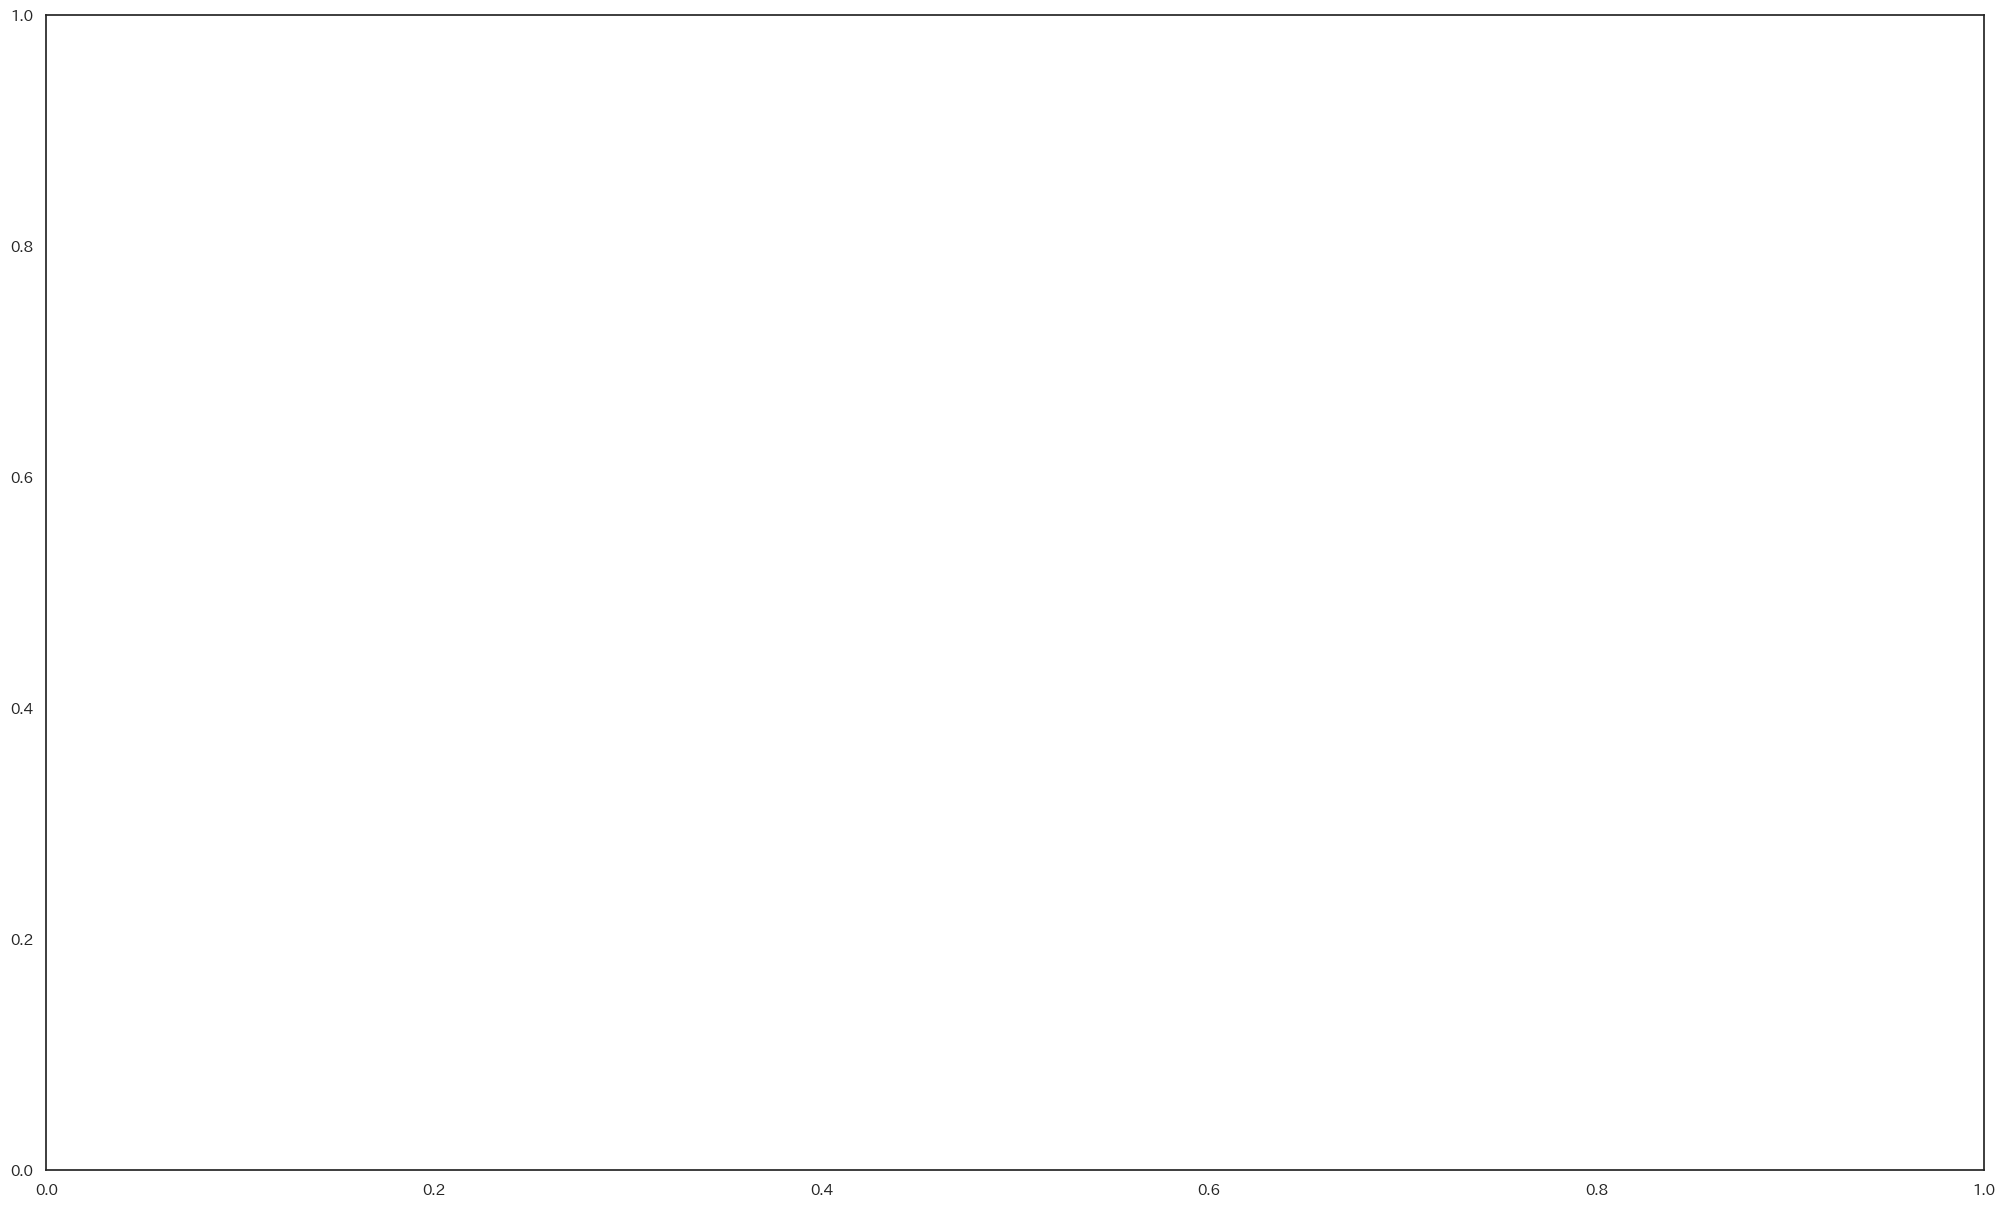

In [42]:
fig = plt.subplots(figsize=(25,15))
sns.heatmap(df_train.corr(method="spearman"), cmap="bwr", annot=True, vmax=1, vmin=-1, center=0)

In [43]:
#説明変数と目的変数に分割
X = df_train.drop("Segmentation", axis=1)
y_A = df_train["Segmentation"].apply(lambda x: 1 if x == "A" else 0)
y_multi = df_train["Segmentation"]

##予測と評価

In [44]:
#ロジスティック回帰(sklearn)
#2値分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_A,test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", solver="liblinear", C=0.1) #C値で正則化の強さを調整(低いほど強い)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))
print("auc = ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))
print("log_loss = ", log_loss(y_true=y_test, y_pred=y_pred_proba))
pd.DataFrame(lr.coef_, columns=X.columns) 

confusion matrix = 
 [[962  16]
 [298  15]]
accuracy =  0.7567776917118513
f1 score =  0.0872093023255814
auc =  0.6765126717497403
log_loss =  0.5176730959734228


,Gender,Age,Work_Experience,Family_Size,Ever_Married_Yes,Ever_Married_null,Graduated_Yes,Graduated_null,Profession_Executive,Profession_Artist,Profession_Healthcare,Profession_Lawyer,Profession_Doctor,Profession_Entertainment,Profession_Homemaker,Profession_Marketing,Profession_Engineer,Work_Experience_null,Spending_Score_High,Spending_Score_Low,Family_Size_null,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0.0,-0.007067,0.013999,-0.225892,0.0,0.0,-0.077975,0.0,0.0,-0.129557,-1.447625,0.412722,0.0,0.478081,0.0,-0.222169,0.244763,0.0,0.184606,0.531587,0.0,0.0,0.0,0.0,0.239828,0.0,-0.212136,0.0


In [45]:
#2クラス予測版ベースラインモデル すべて0(Aではない)として予測
y_pred = [0] * len(y_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
#ベースラインモデルより劣っているため、良くない
#決定木など他のモデルを検討する余地あり

accuracy =  0.7575522850503486


In [46]:
#決定木分析
#2値分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_A, test_size=0.2, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, log_loss
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))
print("auc = ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))
print("log_loss=", log_loss(y_test, y_pred_proba))
#決定木ならベースラインをわずかに上回る

confusion matrix = 
 [[942  36]
 [269  44]]
accuracy =  0.7637490317583269
f1 score =  0.22391857506361323
auc =  0.6891876882468623
log_loss= 0.4995664167793405


In [47]:
#ロジスティック回帰(sklearn)
#多クラス分類の場合
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_multi,test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="sag", C=0.1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[144  48  58  63]
 [ 92  60  92  33]
 [ 44  42 171  44]
 [ 98  10  12 280]]
accuracy =  0.5073586367157242


/usr/local/Cellar/jupyterlab/4.4.1/libexec/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
#多クラス版ベースラインモデル 全てDとして予測
y_pred = ["D"] * len(y_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

#多クラス予測であれば機械学習モデルの方が優秀

accuracy =  0.30983733539891556


confusion matrix = 
 [[150  57  41  65]
 [ 79  84  84  30]
 [ 43  57 157  44]
 [ 94  17   6 283]]
accuracy =  0.5220759101471727


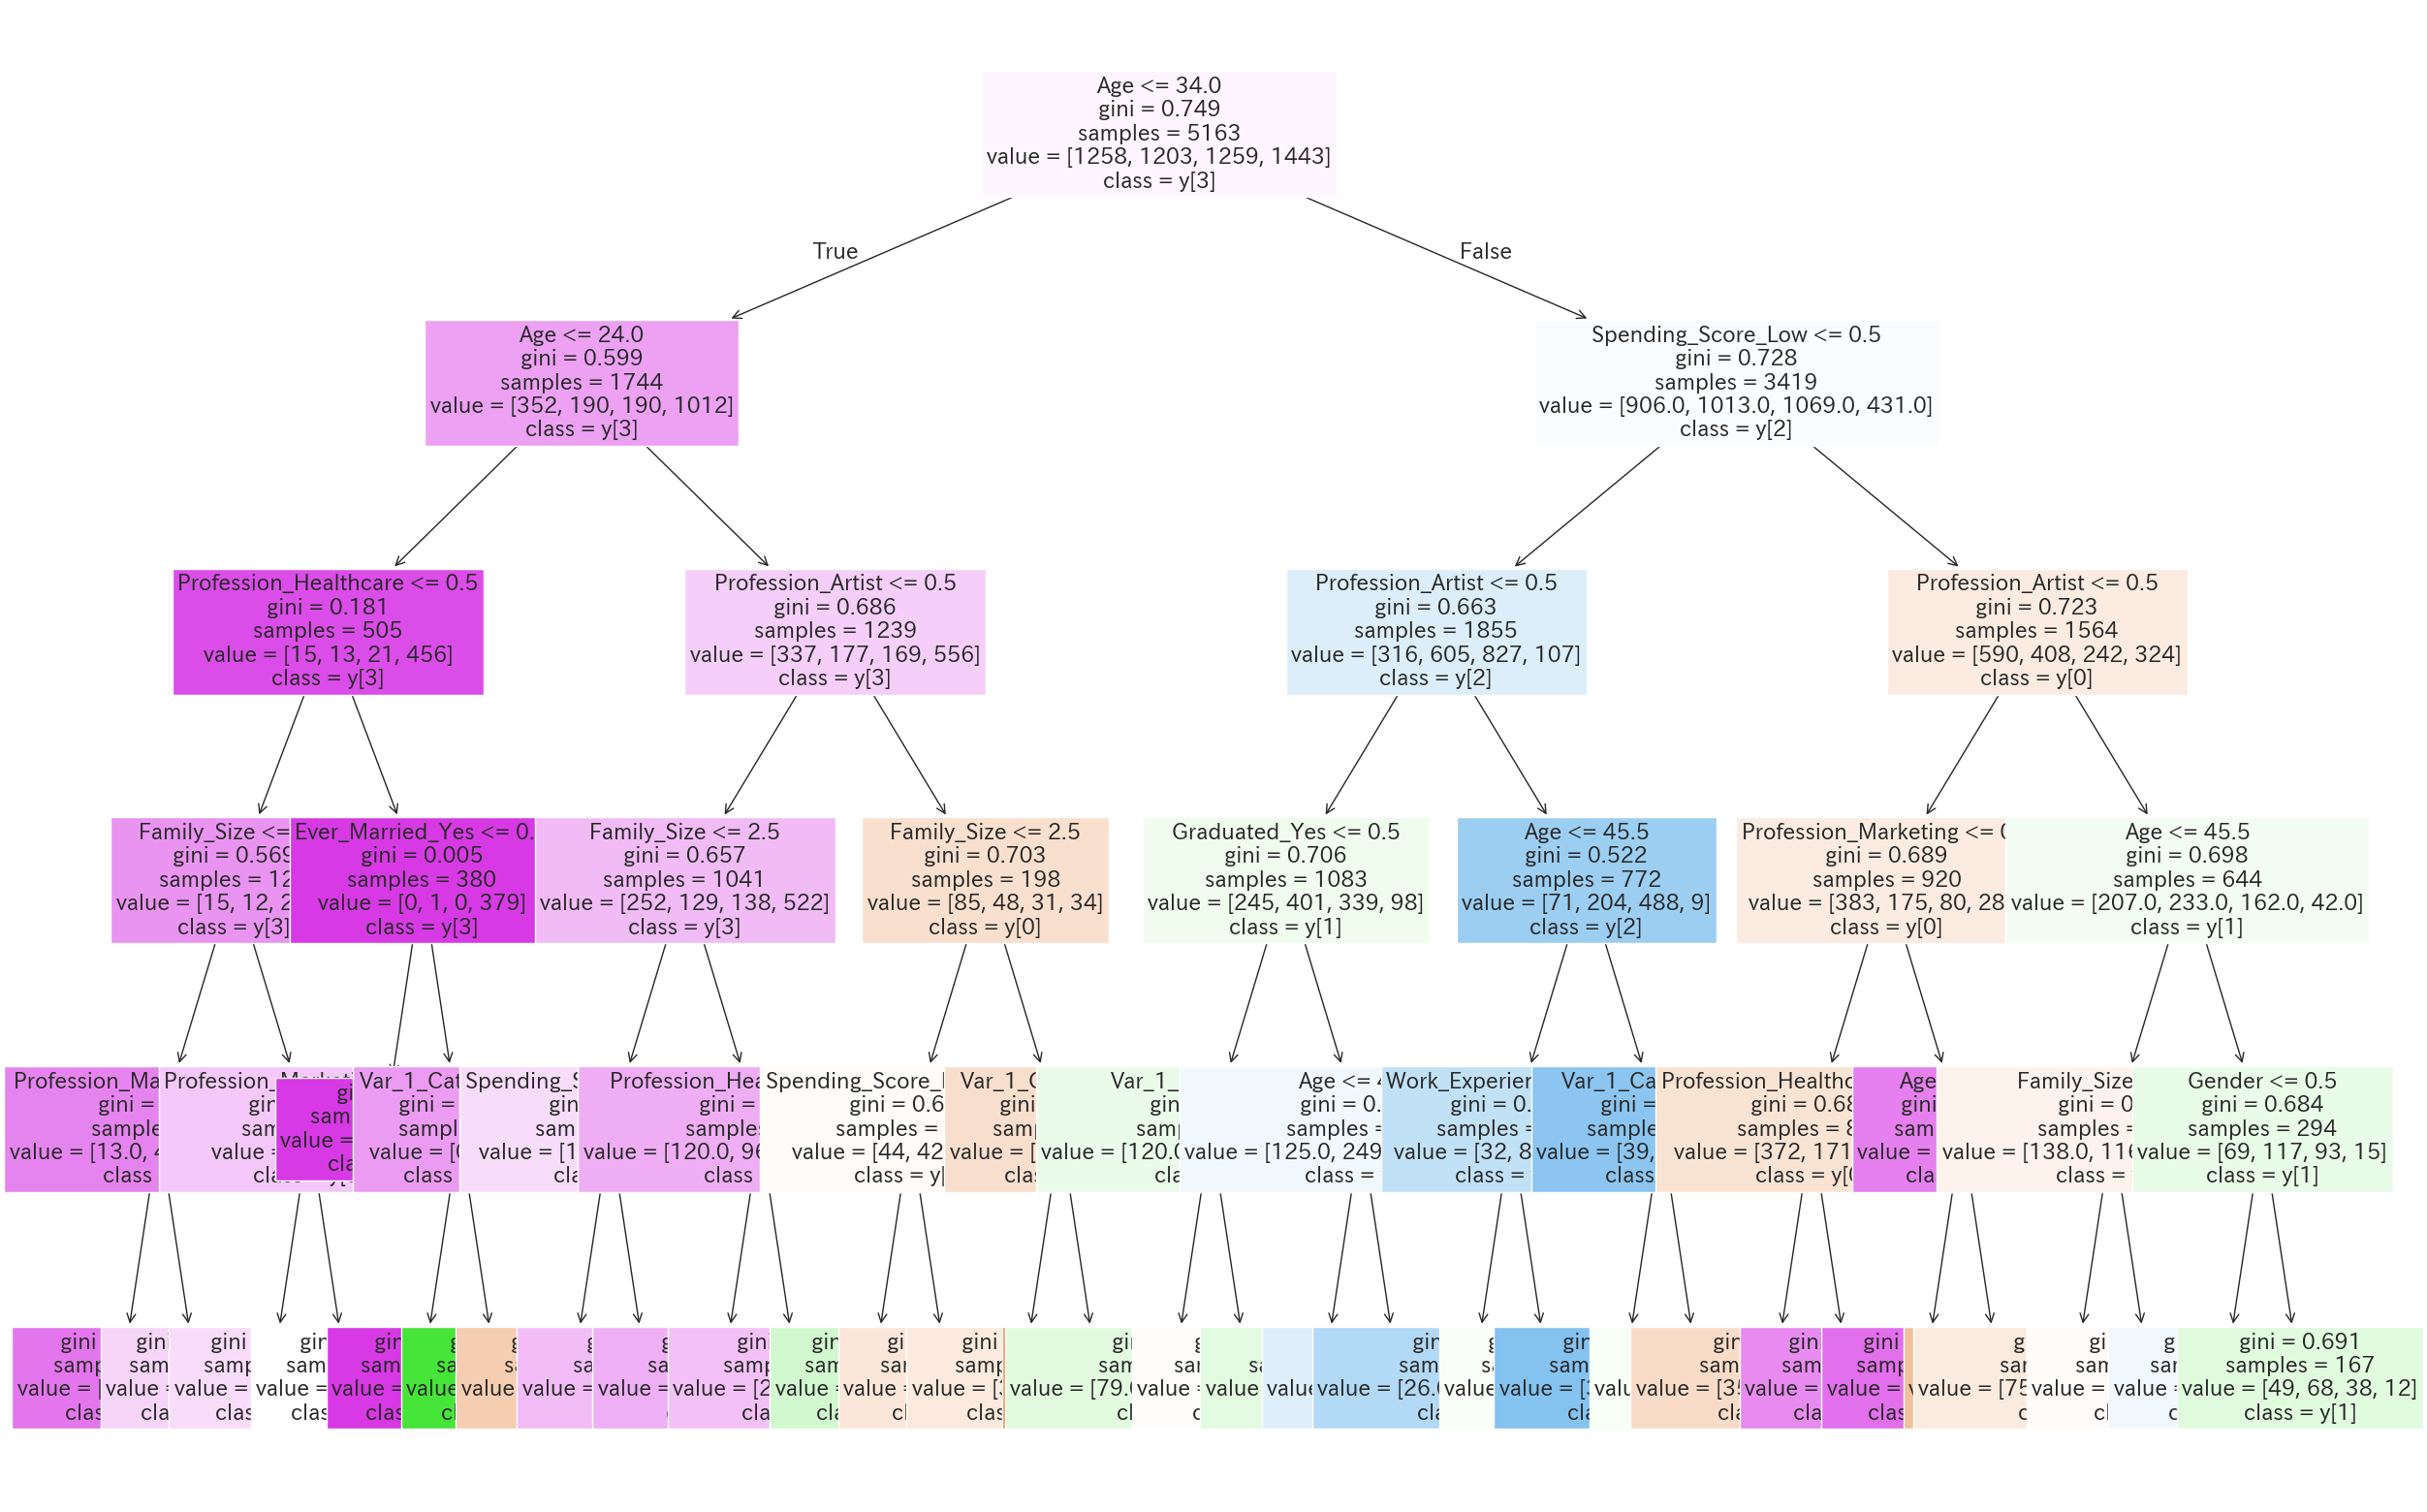

In [50]:
#決定木分析
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

#可視化
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf, feature_names=X_train.columns, class_names=True, filled=True, fontsize=16);

#回帰分析よりも良い結果であるため、決定木モデルを採用

In [51]:
#作成したモデルでsubmitデータを予測
X_submit = df_submit.drop("ID", axis=1)
pred = clf.predict(X_submit)
df_submit["y"] = pred
submit_data = df_submit[["ID", "y"]].set_index("ID")
submit_data.to_csv("Customer_Segment_submit.csv", index=True)
submit_data
#最終スコア0.515

,y
ID,
461642,A
462489,B
459573,A
461424,A
460283,A
...,...
465156,C
459836,D
462705,B
